In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


schools_path = os.path.join("Resources" , "schools_complete.csv")
students_path = os.path.join ("Resources", "students_complete.csv")

schools_data = pd.read_csv(schools_path)
students_data = pd.read_csv(students_path)

data_complete = pd.merge(students_data, schools_data, 
                how="left", 
                on=["school_name", "school_name"])\
                .rename(columns=lambda s:s.lower().replace(" ", "_"))

In [2]:
total_schools = data_complete["school_name"].nunique()
total_students = data_complete["student_id"].nunique()
district_budget = data_complete.drop_duplicates('school_name')['budget'].sum()

math_average = data_complete["math_score"].mean()
reading_average = data_complete["reading_score"].mean()

# Total number of passed students in each class
students_passing_math = data_complete[data_complete["math_score"] >= 70].count()["student_id"]
students_passing_reading = data_complete[data_complete["reading_score"] >= 70].count()["student_id"]

percentage_students_passed_math = (students_passing_math/total_students)*100
percentage_students_passed_reading = (students_passing_reading/total_students)*100

# Porcentage of passed students in the district
district_overall_passing_rate = (percentage_students_passed_math + percentage_students_passed_reading)/2


district_summary = pd.DataFrame ({
                                "Total Schools":[total_schools],
                                "Total Students":[total_students],
                                "District Budget": [district_budget],
                                "District Passing Rate":[district_overall_passing_rate],
                                "Average Math Score": [math_average],
                                "Average Reading Score":[reading_average],
                                "% Passing Math": [percentage_students_passed_math],
                                "% Passing Reading": [percentage_students_passed_reading]
                          })


district_summary = district_summary[["Total Schools", "Total Students", "District Budget", "District Passing Rate",
                                     "Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading"]]

In [3]:
school_type = schools_data.set_index(["school_name"])["type"]
total_students_per_school = data_complete.groupby(["school_name"]).mean()["size"]
budget_per_school = data_complete.groupby(["school_name"]).mean()["budget"]
budget_per_student = budget_per_school/total_students_per_school

math_average_score_per_school = round(data_complete.groupby(["school_name"]).mean()["math_score"],3)
reading_average_score_per_school = round(data_complete.groupby(["school_name"]).mean()["reading_score"],3)

students_passed_math = data_complete[(data_complete["math_score"]>=70)]
students_passed_math_per_school = students_passed_math.groupby(["school_name"]).count()["student_id"]

students_passed_reading = data_complete[(data_complete["reading_score"]>=70)]
students_passed_reading_per_school = students_passed_reading.groupby(["school_name"]).count()["student_id"]

percentage_passed_math_per_school = round((students_passed_math_per_school/total_students_per_school)*100,3)
percentage_passed_reading_per_school = round((students_passed_reading_per_school/total_students_per_school)*100,3)

overall_passed_rate_per_school = round((percentage_passed_math_per_school + percentage_passed_reading_per_school)/2,3)

school_summary = pd.DataFrame ({
      "School Type":school_type, 
      "Number of Students": total_students_per_school, 
      "Budget per School":budget_per_school, 
      "Budget per Student":budget_per_student,
      "Average Math Score": math_average_score_per_school,
      "Average Reading Score":reading_average_score_per_school,
      "% Passing Math": percentage_passed_math_per_school,
      "% Passing Reading": percentage_passed_reading_per_school,
      "% Overall Passing Rate":overall_passed_rate_per_school
      })



In [4]:
top_schools = school_summary.sort_values(by="% Overall Passing Rate", ascending=False)

In [5]:
bottom_schools = school_summary.sort_values(by="% Overall Passing Rate", ascending=True)

In [6]:
# filter per grade
grade_9 = data_complete[data_complete["grade"] == "9th"]
grade_10 = data_complete[data_complete["grade"] == "10th"]
grade_11 = data_complete[data_complete["grade"] == "11th"]
grade_12 = data_complete[data_complete["grade"] == "12th"]

# Average math scores per grade per school

grade_9_math_per_school = round(grade_9.groupby(["school_name"]).mean()["math_score"], 3)
grade_10_math_per_school = round(grade_10.groupby(["school_name"]).mean()["math_score"], 3)
grade_11_math_per_school = round(grade_11.groupby(["school_name"]).mean()["math_score"], 3)
grade_12_math_per_school = round(grade_12.groupby(["school_name"]).mean()["math_score"], 3)

# Combine the grades

avg_math_grade_per_school = pd.DataFrame ({
        "9th": grade_9_math_per_school,
        "10th":grade_10_math_per_school,
        "11th":grade_11_math_per_school,            
        "12th":grade_12_math_per_school
           })
                                    

In [7]:
# Average math scores per grade per school

grade_9_reading_per_school = round(grade_9.groupby(["school_name"]).mean()["reading_score"], 3)
grade_10_reading_per_school = round(grade_10.groupby(["school_name"]).mean()["reading_score"], 3)
grade_11_reading_per_school = round(grade_11.groupby(["school_name"]).mean()["reading_score"], 3)
grade_12_reading_per_school = round(grade_12.groupby(["school_name"]).mean()["reading_score"], 3)

# Combine the grades

avg_reading_grade_per_school = pd.DataFrame ({
        "9th": grade_9_reading_per_school,
        "10th":grade_10_reading_per_school,
        "11th":grade_11_reading_per_school,            
        "12th":grade_12_reading_per_school
           })
                                            

In [8]:
# create bins to categorise the schools based on budget per student

y = pd.cut(x=school_summary["Budget per Student"], bins=[0, 585, 615, 645, 675],
       labels=["<\$585", "\$585 - \$615", "\$615 - \$645", "\$645 - \$675"],
       right=False)
schools_spending = school_summary.assign(Spending=y)

In [9]:
scores_by_school_spending = schools_spending.groupby("Spending")\
                        .mean()[\
                        ["Average Math Score" , 
                        "Average Reading Score", 
                         "% Passing Math", 
                         "% Passing Reading", 
                         "% Overall Passing Rate" ]]

In [10]:
#create bins to categorise the schools based on size

x = pd.cut(x=school_summary["Number of Students"], bins=[0,1500,3000,5000],
       labels=["Small (<1500)","Medium (1500 - 3000)","Large (3000 - 5000)"],
       right=False,
      )
schools_size = school_summary.assign(Size=x)

In [11]:
scores_by_school_size = schools_size.groupby("Size")\
                        .mean()[\
                        ["Average Math Score" , 
                        "Average Reading Score", 
                         "% Passing Math", 
                         "% Passing Reading", 
                         "% Overall Passing Rate" ]]

In [12]:
scores_by_school_type = school_summary.groupby("School Type")\
                        .mean()[\
                        ["Average Math Score" , 
                        "Average Reading Score", 
                         "% Passing Math", 
                         "% Passing Reading", 
                         "% Overall Passing Rate" ]]

In [13]:
# Graphics

# Graphic Spending vs Passed
spending_vs_passing = schools_spending.groupby("Spending")\
                        .mean()[ 
                         "% Overall Passing Rate" ]

data_spending = pd.DataFrame(spending_vs_passing)

# Graphic Size vs Passed
size_vs_passed = schools_size.groupby("Size")\
                        .mean()["% Overall Passing Rate" ]

data_size = pd.DataFrame(size_vs_passed)


# Graphic Charter vs District
charter_vs_district_passed_students = school_summary.groupby("School Type")\
                        .mean()[\
                        [ 
                         "% Passing Math", 
                         "% Passing Reading" 
                          ]
                        ]


In [14]:
#Styling

school_summary["Budget per School"] = school_summary["Budget per School"].map("${:,.2f}".format)
school_summary["Budget per Student"] = school_summary["Budget per Student"].map("${:,.2f}".format)

top_schools["Budget per School"] = top_schools["Budget per School"].map("${:,.2f}".format)
top_schools["Budget per Student"] = top_schools["Budget per Student"].map("${:,.2f}".format)


bottom_schools["Budget per Student"] = bottom_schools["Budget per Student"].map("${:,.2f}".format)
bottom_schools["Budget per School"] = bottom_schools["Budget per School"].map("${:,.2f}".format)



## District Summary

In [15]:
district_summary["District Budget"] = district_summary["District Budget"].map("${:,.2f}".format)

In [16]:
district_summary

,Total Schools,Total Students,District Budget,District Passing Rate,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading
0,15,39170,"$24,649,428.00",80.393158,78.985371,81.87784,74.980853,85.805463


## School Summary

In [17]:
school_summary

,School Type,Number of Students,Budget per School,Budget per Student,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Bailey High School,District,4976.0,"$3,124,928.00",$628.00,77.048,81.034,66.680,81.933,74.306
Cabrera High School,Charter,1858.0,"$1,081,356.00",$582.00,83.062,83.976,94.133,97.040,95.586
Figueroa High School,District,2949.0,"$1,884,411.00",$639.00,76.712,81.158,65.988,80.739,73.364
Ford High School,District,2739.0,"$1,763,916.00",$644.00,77.103,80.746,68.310,79.299,73.804
Griffin High School,Charter,1468.0,"$917,500.00",$625.00,83.351,83.817,93.392,97.139,95.266
Hernandez High School,District,4635.0,"$3,022,020.00",$652.00,77.290,80.934,66.753,80.863,73.808
Holden High School,Charter,427.0,"$248,087.00",$581.00,83.803,83.815,92.506,96.253,94.380
Huang High School,District,2917.0,"$1,910,635.00",$655.00,76.629,81.183,65.684,81.316,73.500
Johnson High School,District,4761.0,"$3,094,650.00",$650.00,77.072,80.966,66.058,81.222,73.640
Pena High School,Charter,962.0,"$585,858.00",$609.00,83.840,84.045,94.595,95.946,95.270


## Top 5 Performing Schools (By Passing Rate)

In [18]:
top_schools.head(5)

,School Type,Number of Students,Budget per School,Budget per Student,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Cabrera High School,Charter,1858.0,"$1,081,356.00",$582.00,83.062,83.976,94.133,97.040,95.586
Thomas High School,Charter,1635.0,"$1,043,130.00",$638.00,83.418,83.849,93.272,97.309,95.291
Pena High School,Charter,962.0,"$585,858.00",$609.00,83.840,84.045,94.595,95.946,95.270
Griffin High School,Charter,1468.0,"$917,500.00",$625.00,83.351,83.817,93.392,97.139,95.266
Wilson High School,Charter,2283.0,"$1,319,574.00",$578.00,83.274,83.989,93.868,96.540,95.204


## Worst 5 Performing Schools (By Passing Rate)

In [19]:
bottom_schools.head(5)

,School Type,Number of Students,Budget per School,Budget per Student,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Rodriguez High School,District,3999.0,"$2,547,363.00",$637.00,76.843,80.745,66.367,80.220,73.294
Figueroa High School,District,2949.0,"$1,884,411.00",$639.00,76.712,81.158,65.988,80.739,73.364
Huang High School,District,2917.0,"$1,910,635.00",$655.00,76.629,81.183,65.684,81.316,73.500
Johnson High School,District,4761.0,"$3,094,650.00",$650.00,77.072,80.966,66.058,81.222,73.640
Ford High School,District,2739.0,"$1,763,916.00",$644.00,77.103,80.746,68.310,79.299,73.804


## Math Scores by Grade per School

In [20]:
avg_math_grade_per_school

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.084,76.997,77.516,76.492
Cabrera High School,83.095,83.155,82.766,83.277
Figueroa High School,76.403,76.540,76.884,77.151
Ford High School,77.361,77.672,76.918,76.180
Griffin High School,82.044,84.229,83.842,83.356
Hernandez High School,77.438,77.337,77.136,77.187
Holden High School,83.787,83.430,85.000,82.855
Huang High School,77.027,75.909,76.447,77.226
Johnson High School,77.188,76.691,77.492,76.863


## Reading Score by Grade per School

In [21]:
avg_reading_grade_per_school

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303,80.907,80.946,80.912
Cabrera High School,83.676,84.253,83.788,84.288
Figueroa High School,81.199,81.409,80.640,81.385
Ford High School,80.633,81.263,80.404,80.662
Griffin High School,83.369,83.707,84.288,84.014
Hernandez High School,80.867,80.660,81.396,80.857
Holden High School,83.677,83.325,83.816,84.699
Huang High School,81.290,81.512,81.417,80.306
Johnson High School,81.261,80.773,80.616,81.228


## Scores by School Spending

In [22]:
scores_by_school_spending

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending,,,,,
<\$585,83.455250,83.933750,93.460000,96.611000,95.035500
\$585 - \$615,83.599500,83.885500,94.231000,95.900500,95.065500
\$615 - \$645,79.079167,81.891500,75.668167,86.106500,80.887500
\$645 - \$675,76.997000,81.027667,66.165000,81.133667,73.649333


Text(0.5, 1.0, 'Overall passing rate related to the budget')

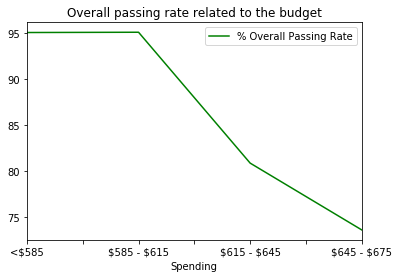

In [23]:
data_spending.plot(c="green")
plt.title("Overall passing rate related to the budget")

## Scores by School Size

In [24]:
scores_by_school_size

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Size,,,,,
Small (<1500),83.664667,83.892333,93.497667,96.446000,94.97200
Medium (1500 - 3000),80.904875,82.822750,83.556875,90.588625,87.07275
Large (3000 - 5000),77.063250,80.919750,66.464500,81.059500,73.76200


Text(0.5, 1.0, 'Overall passing rate related to the school size')

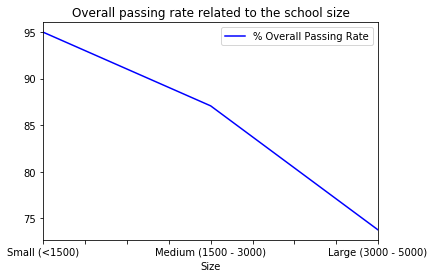

In [25]:
data_size.plot(c="blue")
plt.title("Overall passing rate related to the school size")

## Scores by School Type

In [26]:
scores_by_school_type

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,
Charter,83.473625,83.896500,93.620750,96.586625,95.103750
District,76.956714,80.966571,66.548571,80.798857,73.673714


In [27]:
charter_vs_district_passed_students

,% Passing Math,% Passing Reading
School Type,,
Charter,93.620750,96.586625
District,66.548571,80.798857


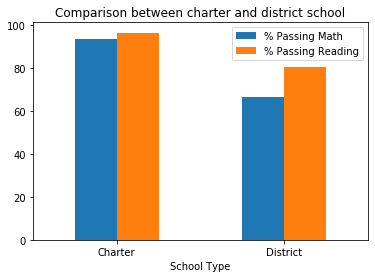

In [28]:
charter_vs_district_passed_students.plot.bar()
plt.title("Comparison between charter and district school")
plt.xticks(rotation=360)



def autolabel(percentage):
    """Attach a text label above each bar in *%*, displaying its percentage."""
    for value in values:
        value = value.get_height()

#autolabel(percentage_passed_math_per_school)
#autolabel(percentage_passed_reading_per_school)

#fig.tight_layout()

#plt.show()       





# Observable trends based on the data

## 

    This school district encompass 15 schools. Seven follow the traditional school system, while the other eight are charter schools.

    More than 50% of the students attend the traditional public school, however the study showed that greater percentage of charter school students passed state reading and math tests than students at traditional public schools. 

    There is no significant difference in student grades between traditional public and charter school, but there is in the number of students approved by the state tests. In the traditional public school 73% students were approved in reading and math, but only 66% succeeded in math. While, 93% charter school students succeeded in math and 96% in reading, totalizing 95% passed in charter school.

    The graphics “Overall passing rate related to the budget” and "Overall passing rate related to the school size" shows that the students performance is more related to the number of students per school than to the budget per student. 

    The smaller and medium sized school's performance is much better than the large size schools. 

    We also can see that behavior in the table “Top 5 Performing Schools (By Passing Rate)”, that shows the top 5 as charter schools. This may be due to the reason that the student population in charter schools is less than the district schools.

